# 쇼핑몰 지점별 매출액 예측, 기초 연습

## 데이터 불러오기
- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)!!!!

In [100]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [101]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [103]:
train.describe()
# 최소값이 마이너스, 0인 이상치 확인

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Weekly_Sales
count,6255.000000,6255.000000,6255.000000,6255.000000,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000,6255.000000,6.255000e+03
mean,3128.000000,23.000000,60.639199,3.344369,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173,8.029236,1.047619e+06
std,1805.807299,12.988211,18.624094,0.455364,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908,1.874875,5.654362e+05
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.410000,135.160000,4.077000,2.099862e+05
25%,1564.500000,12.000000,47.170000,2.917000,1844.295000,39.755000,4.700000,499.895000,1742.305000,6.916500,5.538695e+05
50%,3128.000000,23.000000,62.720000,3.413000,5221.140000,205.410000,24.600000,1532.630000,3226.410000,7.906000,9.604761e+05
75%,4691.500000,34.000000,75.220000,3.722000,9199.242500,1931.005000,104.010000,3640.905000,5444.030000,8.622000,1.421209e+06
max,6255.000000,45.000000,100.140000,4.308000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,14.313000,3.818686e+06


- promotion에 결측치 있음
- date, isholiday : 숫자가 아니라서 전처리 필요

## 시각화

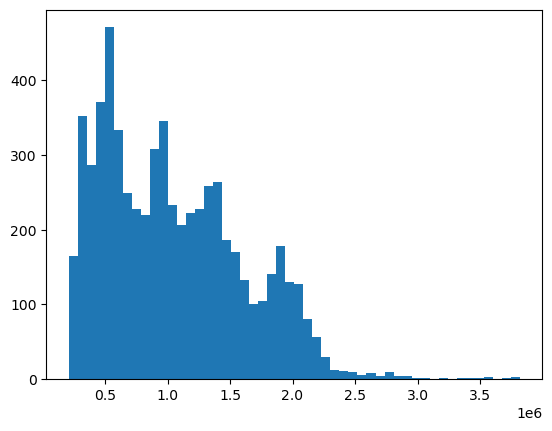

In [104]:
import matplotlib.pyplot as plt

plt.hist(train.Weekly_Sales, bins=50)
plt.show()

- 일부 특이값 제외하면, 값이 작은쪽에 몰려있음

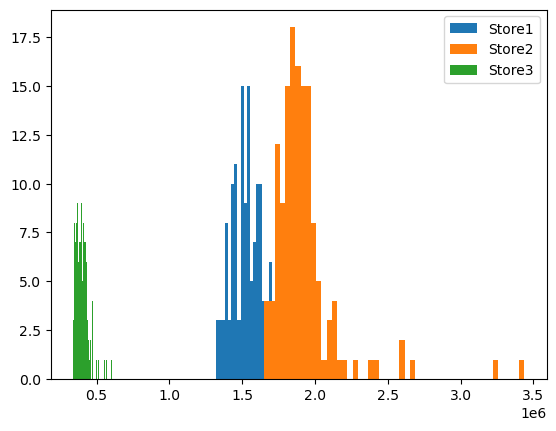

In [105]:
plt.hist(train[train.Store == 1].Weekly_Sales, bins = 50)
plt.hist(train[train.Store ==2].Weekly_Sales, bins = 50)
plt.hist(train[train.Store ==3].Weekly_Sales, bins = 50)

plt.legend(['Store1', 'Store2', 'Store3'])
plt.show()

- 지점별로 위클리 매출에 큰 차이가 있음

## 전처리

### 1. 결측치 처리

In [106]:
train = train.fillna(0)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


### 2. Date 전처리
- 문자를 숫자로

In [107]:
def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])

train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


In [108]:
train = train.drop(columns = ['Date'])
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


In [109]:
"""
def get_month(date):
    month = date[3:5]
    month = int(month)
    return month

train['Month'] = train['Date'].apply(get_month)
train
"""

"\ndef get_month(date):\n    month = date[3:5]\n    month = int(month)\n    return month\n\ntrain['Month'] = train['Date'].apply(get_month)\ntrain\n"

### 3. Promotion Scaling
- promotion 별 수치 범위의 차이가 큼, 스케일링을 통해 수치 범위를 비슷하게 맞추기

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

train[['Scaled_Promotion1','Scaled_Promotion2', 'Scaled_Promotion3',
       'Scaled_Promotion4','Scaled_Promotion5']] = scaled

train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [111]:
# 기존 컬럼 제거
train = train.drop(columns = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])
train.head()

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,False,1643690.90,5,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,8.106,True,1641957.44,12,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,8.106,False,1611968.17,19,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,8.106,False,1409727.59,26,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,8.106,False,1554806.68,5,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303


### 4. IsHoliday 전처리
- 휴일이면 True => 1
- 휴일아니면 False => 0으로

In [112]:
def holiday_to_num(isholiday):
    if isholiday == True:
        num = 1
    else:
        num = 0
    return num

train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_num)
train.head()

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,NumberHoliday
0,1,1,42.31,2.572,8.106,False,1643690.90,5,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0
1,2,1,38.51,2.548,8.106,True,1641957.44,12,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,1
2,3,1,39.93,2.514,8.106,False,1611968.17,19,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0
3,4,1,46.63,2.561,8.106,False,1409727.59,26,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0
4,5,1,46.50,2.625,8.106,False,1554806.68,5,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0


### 5. 같은 전처리 test 데이터에도 동일하게

In [113]:
test = test.fillna(0)

test['Day'] = test['Date'].apply(lambda x: date_encoder(x)[0])
test['Month'] = test['Date'].apply(lambda x : date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x : date_encoder(x)[2])
test = test.drop(columns = ['Date'])

test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_num)

scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
test[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

test = test.drop(columns = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

test

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Day,Month,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,68.55,3.617,6.573,False,5,10,2012,0,0.956583,-0.170211,-0.079007,0.686920,0.509844
1,2,1,62.99,3.601,6.573,False,12,10,2012,0,-0.053718,-0.170211,-0.080897,-0.106760,1.068815
2,3,1,67.97,3.594,6.573,False,19,10,2012,0,-0.245241,-0.170211,-0.081492,-0.244199,0.190716
3,4,1,69.16,3.506,6.573,False,26,10,2012,0,0.030535,-0.163792,-0.081292,0.012961,-0.054187
4,5,2,70.27,3.617,6.170,False,5,10,2012,0,0.612584,-0.170211,-0.080536,0.531594,0.565067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,46.97,3.755,5.217,False,26,10,2012,0,-0.398965,-0.169683,-0.082230,-0.265323,-0.260073
176,177,45,64.89,3.985,8.667,False,5,10,2012,0,0.445482,-0.170211,-0.078895,0.327864,0.197316
177,178,45,54.47,4.000,8.667,False,12,10,2012,0,-0.075621,-0.170211,-0.080938,-0.107560,0.598392
178,179,45,56.47,3.969,8.667,False,19,10,2012,0,-0.067571,-0.170211,-0.081819,-0.150097,0.002305


## 모델링(선형회귀)
- 선형회귀(Linear Regression)
- 선형 회귀란 예측하고자 하는 종속 변수 y와 독립 변수 x의 관계를 가장 잘 나타내는 선(Line)을 구하는 회귀분석 방법

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [94]:
train = train.drop(columns = ['id','IsHoliday'])
test = test.drop(columns = ['id', 'IsHoliday'])

x_train = train.drop(columns = ['Weekly_Sales'])
y_train = train[['Weekly_Sales']]

In [95]:
model.fit(x_train, y_train)

LinearRegression()

In [96]:
prediction = model.predict(test)
print('------------예측 데이터의 상위 10개 값 확인------------\n')
print(prediction[:10])

------------예측 데이터의 상위 10개 값 확인------------

[[1246231.4608534 ]
 [1146793.41676474]
 [1135450.7237401 ]
 [1143021.36765385]
 [1214523.26197457]
 [1124288.54612625]
 [1177240.39482033]
 [1126243.28018981]
 [1137306.87535375]
 [1134745.93997175]]


/Users/angela/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## 모델링(랜덤포레스트)
- 랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종
- "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택
-  과적합(Overfitting)을 방지할 수 있고, 보다 일반화된 성능을 끌어냄

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
model = RandomForestRegressor()

In [114]:
train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])

x_train = train.drop(columns = ['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [115]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [116]:
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1596744.982  1516281.2101 1480792.6243 1435908.6774 1799902.9369
 1750387.0621 1723077.346  1690391.4047  503223.7945  490987.671 ]


/Users/angela/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
